In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance
from sklearn.metrics import mean_tweedie_deviance
from sklearn.metrics import mean_absolute_percentage_error

In [85]:
hour =pd.read_csv('hour.csv')
display(hour.head())

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [86]:
hour.drop("instant", axis=1, inplace=True)
display(hour.head())

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [87]:
hour['dteday'] = pd.to_datetime(hour['dteday'])
hour.dtypes

dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

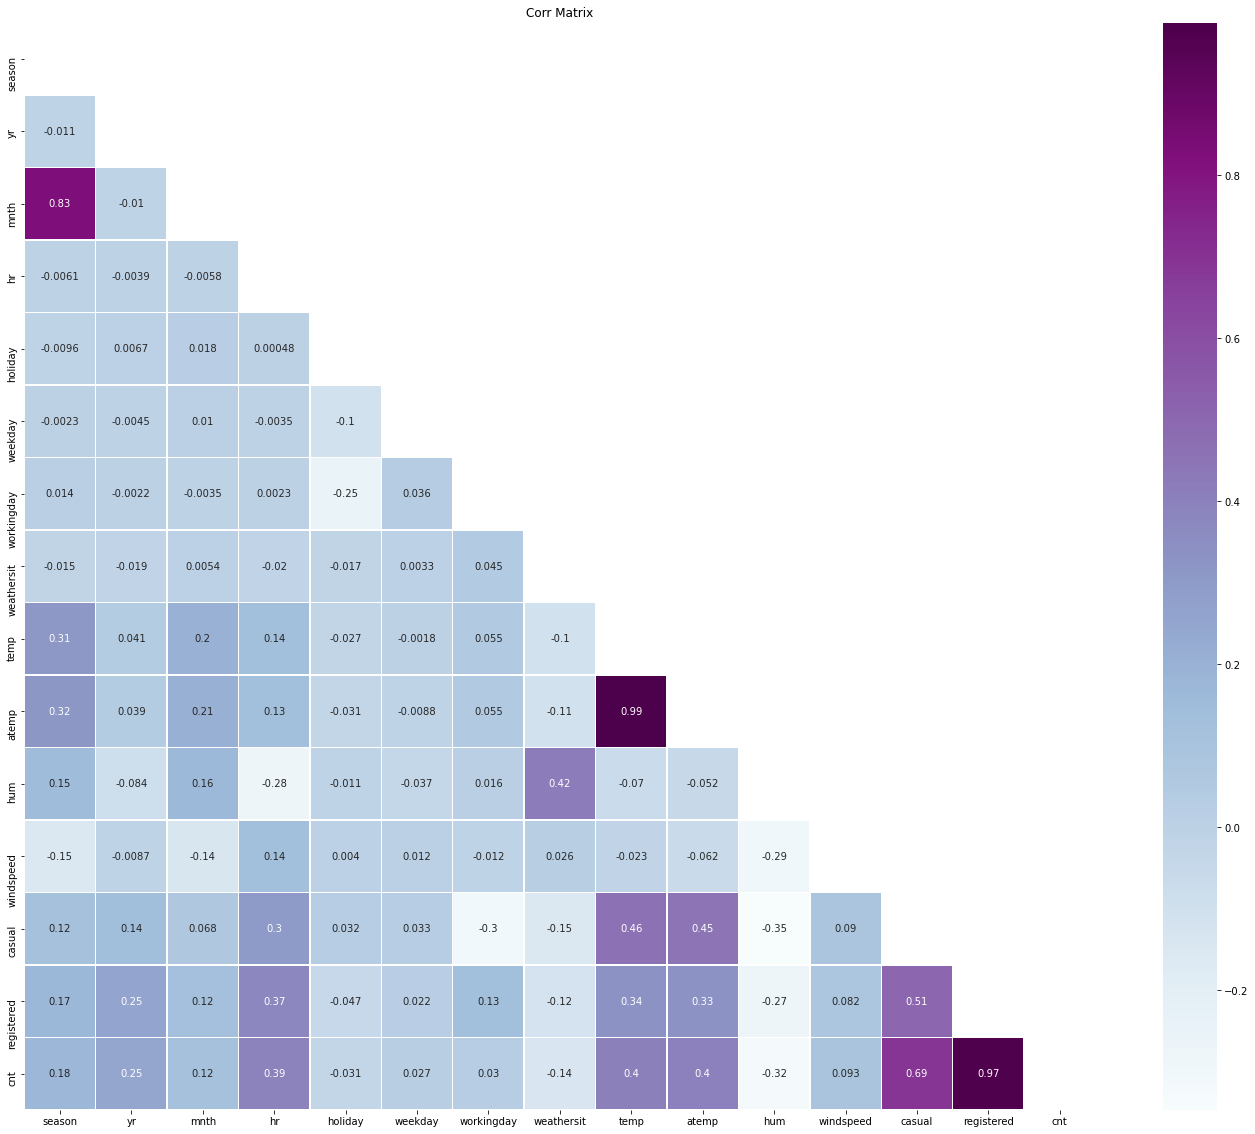

In [88]:
fig, ax = plt.subplots(figsize=(24,20))
ax.set_title("Corr Matrix")

mask1 = np.triu(np.ones_like(hour.corr()))

sns.heatmap(hour.corr(), mask=mask1, annot=True, linewidths=.5, ax=ax, cmap="BuPu")

plt.show()

In [89]:
hour.drop('atemp', axis=1, inplace=True)
hour.drop('season', axis=1, inplace=True)
hour.drop('cnt', axis=1, inplace=True)
hour.drop('dteday', axis=1, inplace=True)

In [90]:
hour.count

<bound method DataFrame.count of        yr  mnth  hr  holiday  weekday  workingday  weathersit  temp   hum  \
0       0     1   0        0        6           0           1  0.24  0.81   
1       0     1   1        0        6           0           1  0.22  0.80   
2       0     1   2        0        6           0           1  0.22  0.80   
3       0     1   3        0        6           0           1  0.24  0.75   
4       0     1   4        0        6           0           1  0.24  0.75   
...    ..   ...  ..      ...      ...         ...         ...   ...   ...   
17374   1    12  19        0        1           1           2  0.26  0.60   
17375   1    12  20        0        1           1           2  0.26  0.60   
17376   1    12  21        0        1           1           1  0.26  0.60   
17377   1    12  22        0        1           1           1  0.26  0.56   
17378   1    12  23        0        1           1           1  0.26  0.65   

       windspeed  casual  registered  
0  

In [91]:
hour = hour[hour["holiday"] == 0 ]
display(hour_filted.head())

,dteday,season,yr,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered
0,2011-01-01,1,0,0,0,6,0,1,0.24,0.81,0.0,3,13
1,2011-01-01,1,0,1,0,6,0,1,0.22,0.80,0.0,8,32
2,2011-01-01,1,0,2,0,6,0,1,0.22,0.80,0.0,5,27
3,2011-01-01,1,0,3,0,6,0,1,0.24,0.75,0.0,3,10
4,2011-01-01,1,0,4,0,6,0,1,0.24,0.75,0.0,0,1


In [92]:
hour.count

<bound method DataFrame.count of        yr  mnth  hr  holiday  weekday  workingday  weathersit  temp   hum  \
0       0     1   0        0        6           0           1  0.24  0.81   
1       0     1   1        0        6           0           1  0.22  0.80   
2       0     1   2        0        6           0           1  0.22  0.80   
3       0     1   3        0        6           0           1  0.24  0.75   
4       0     1   4        0        6           0           1  0.24  0.75   
...    ..   ...  ..      ...      ...         ...         ...   ...   ...   
17374   1    12  19        0        1           1           2  0.26  0.60   
17375   1    12  20        0        1           1           2  0.26  0.60   
17376   1    12  21        0        1           1           1  0.26  0.60   
17377   1    12  22        0        1           1           1  0.26  0.56   
17378   1    12  23        0        1           1           1  0.26  0.65   

       windspeed  casual  registered  
0  

In [93]:
hour.drop('holiday', axis=1, inplace=True)

In [ ]:
new_season = pd.get_dummies(hour['mnth'], prefix='month', drop_first=False)
new_weather = pd.get_dummies(hour['weathersit'], prefix='weather', drop_first=False)
new_year = pd.get_dummies(hour['yr'], prefix='yr', drop_first=False)


In [94]:
cas = hour.copy()
reg = hour.copy()
display(cas.head())
display(reg.head())

,yr,mnth,hr,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered
0,0,1,0,6,0,1,0.24,0.81,0.0,3,13
1,0,1,1,6,0,1,0.22,0.80,0.0,8,32
2,0,1,2,6,0,1,0.22,0.80,0.0,5,27
3,0,1,3,6,0,1,0.24,0.75,0.0,3,10
4,0,1,4,6,0,1,0.24,0.75,0.0,0,1


,yr,mnth,hr,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered
0,0,1,0,6,0,1,0.24,0.81,0.0,3,13
1,0,1,1,6,0,1,0.22,0.80,0.0,8,32
2,0,1,2,6,0,1,0.22,0.80,0.0,5,27
3,0,1,3,6,0,1,0.24,0.75,0.0,3,10
4,0,1,4,6,0,1,0.24,0.75,0.0,0,1


In [95]:
cas.drop("registered", axis=1, inplace=True)
display(cas.head())

,yr,mnth,hr,weekday,workingday,weathersit,temp,hum,windspeed,casual
0,0,1,0,6,0,1,0.24,0.81,0.0,3
1,0,1,1,6,0,1,0.22,0.80,0.0,8
2,0,1,2,6,0,1,0.22,0.80,0.0,5
3,0,1,3,6,0,1,0.24,0.75,0.0,3
4,0,1,4,6,0,1,0.24,0.75,0.0,0


In [96]:
cas= cas[cas["casual"] > 0]
display(cas.head())

,yr,mnth,hr,weekday,workingday,weathersit,temp,hum,windspeed,casual
0,0,1,0,6,0,1,0.24,0.81,0.0,3
1,0,1,1,6,0,1,0.22,0.80,0.0,8
2,0,1,2,6,0,1,0.22,0.80,0.0,5
3,0,1,3,6,0,1,0.24,0.75,0.0,3
6,0,1,6,6,0,1,0.22,0.80,0.0,2


In [97]:
reg.drop("casual", axis=1, inplace=True)
display(reg.head())

,yr,mnth,hr,weekday,workingday,weathersit,temp,hum,windspeed,registered
0,0,1,0,6,0,1,0.24,0.81,0.0,13
1,0,1,1,6,0,1,0.22,0.80,0.0,32
2,0,1,2,6,0,1,0.22,0.80,0.0,27
3,0,1,3,6,0,1,0.24,0.75,0.0,10
4,0,1,4,6,0,1,0.24,0.75,0.0,1


In [98]:
reg= reg[reg["registered"] > 0]
display(reg.head())

,yr,mnth,hr,weekday,workingday,weathersit,temp,hum,windspeed,registered
0,0,1,0,6,0,1,0.24,0.81,0.0,13
1,0,1,1,6,0,1,0.22,0.80,0.0,32
2,0,1,2,6,0,1,0.22,0.80,0.0,27
3,0,1,3,6,0,1,0.24,0.75,0.0,10
4,0,1,4,6,0,1,0.24,0.75,0.0,1
